# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Nguyễn Văn Việt, Trần Duy Hoàng, Vũ Năng Anh Hoàng.

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Learning Outcomes

* Design and build a simulation environment that models sensor inputs, actuator effects, and performance measurement.
* Apply core AI concepts by implementing the agent function for a simple and model-based reflex agents that respond to environmental percepts.
* Practice how the environment and the agent function interact.
* Analyze agent performance through controlled experiments across different environment configurations.
* Graduate Students: Develop strategies for handling uncertainty and imperfect information in autonomous agent systems.

## Instructions

Total Points: Undergrads 98 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

### AI Use

Here are some guidelines that will make it easier for you:

* __Don't:__ Rely on AI auto completion. You will waste a lot of time trying to figure out how the suggested code relates to what we do in class. Turn off AI code completion (e.g., Copilot) in your IDE.
* __Don't:__ Do not submit code/text that you do not understand or have not checked to make sure that it is complete and correct.
* __Do:__ Use AI for debugging and letting it explain code and concepts from class.

### Using Visual Studio Code

If you use VS code then you can use `Export` (click on `...` in the menu bar) to save your notebook as a HTML file. Note that you have to run all blocks before so the HTML file contains your output.

### Using Google Colab

In Colab you need to save the notebook on GoogleDrive to work with it. For this you need to mount your google dive and change to the correct directory by uncommenting the following lines and running the code block.

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/lab02_NguyenVanViet_3122410469/lab02 - search (tt)/lab02_01_agents')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Once you are done with the assignment and have run all code blocks using `Runtime/Run all`, you can convert the file on your GoogleDrive into HTML be uncommenting the following line and running the block.

In [ ]:
# %jupyter nbconvert --to html Copy\ of\ robot_vacuum.ipynb

You may have to fix the file location or the file name to match how it looks on your GoogleDrive. You can navigate in Colab to your GoogleDrive using the little folder symbol in the navigation bar to the left.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [ ]:
# make sure numpy is installed
%pip install -q numpy

In [ ]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [ ]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

np.str_('east')

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [ ]:
def simple_environment(agent_function, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: south
step 1 - action: west
step 2 - action: north
step 3 - action: west
step 4 - action: east
step 5 - action: south
step 6 - action: south
step 7 - action: west
step 8 - action: north
step 9 - action: west
step 10 - action: north
step 11 - action: suck
step 12 - action: west
step 13 - action: west
step 14 - action: west
step 15 - action: north
step 16 - action: west
step 17 - action: east
step 18 - action: suck
step 19 - action: south


2

# Tasks 1

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

Thiết lập một môi trường giả lập cho vacuum cleaner agent. Với tham số:
  + agent_func: hàm agent nhận percept và trả về hành động.
  + size: kích thước của môi trường.
  + dirt_prob: xác suất 1 ô bẩn.
  + max_step: số bước tối đa có thể đi.
  + verbose: in trạng thái môi trường.

Kết quả trả về:
  + list_act: danh sách các hoạt động của agent
  +steps_total: số bước agent đã thực hiện

In [ ]:
def display_envi(cols,rows,envi,agent_pos):
  env_copy= np.full((rows,cols),".",dtype=str)
  env_copy[envi==True]= "D" # ô bẩn
  r,c= agent_pos
  env_copy[r,c]= "A"  #vị trí agent
  print("\n".join(" ".join(row) for row in env_copy))

In [ ]:
# Your code and description goes here
import numpy as np
import matplotlib.pyplot as plt
import random
#Khởi tạo môi trường
def _create_vacuum_enviroment(size =(5,5),dirt_prob = 0.2, verbose=True):

 rows, cols = size
 envi= np.random.choice([False, True], size=size, p=[1-dirt_prob, dirt_prob])
 agent_pos=[random.randint(0,rows-1),random.randint(0,cols-1)]
 if verbose:
  print("Initial Environment:")
  display_envi(cols,rows,envi,agent_pos)
 return envi, agent_pos

In [ ]:
#hàm cập nhật lại môi trường và vị trí của agent khi agent hành động
# trả về envi mới, vị trí agent mới, và trạng thái có di chuyển hay không
def update_envi(envi,agent_pos,act):
  r,c = agent_pos
  rows,cols= envi.shape
  new_agent_pos = list(agent_pos)

  if act=="suck":
    envi[r,c]=False
    return envi, agent_pos, False
  elif act =="north" and r > 0:
    new_agent_pos[0]-=1
  elif act =="south" and r < rows-1:
    new_agent_pos[0] +=1
  elif act== "west" and c > 0:
    new_agent_pos[1] -=1
  elif act =="east" and c < cols-1:
    new_agent_pos[1] +=1

  moved = (new_agent_pos != agent_pos)
  return envi, new_agent_pos, moved

In [ ]:
# Chạy mô phỏng agent trong môi trường
def simulation_envi(agent_func, envi, agent_pos, max_steps=100, verbose=True):
    list_act = []
    steps_total = 0

    if verbose:
        print(f"số ô bẩn: {np.sum(envi)}")
        print("-" * 20)

    for step in range(max_steps):
        if np.sum(envi) == 0:
            if verbose:
                print(f"\nTất cả các ô đã sạch, số bước agent thực hiện = {steps_total}.")
            break
        r, c = agent_pos
        dirty = envi[r, c]
        rows, cols = envi.shape
        bumpers = {
            "north": r == 0,
            "south": r == rows - 1,
            "west": c == 0,
            "east": c == cols - 1
        }
        action = agent_func(bumpers, dirty)
        list_act.append(action)
        steps_total += 1
        if verbose:
            print(f"Bước {step + 1}: Agent ở vị trí ({r},{c}), bẩn : {dirty},cảm biến chạm tường: {bumpers}, hành động: {action}")
        envi, agent_pos, moved = update_envi(envi, agent_pos, action)

        if verbose:
            display_envi(cols, rows, envi, agent_pos)
            print("-" * 20)

    if np.sum(envi) > 0 and verbose:
        print(f"\nMô phỏng kết thúc với  {max_steps} bước. nhưng còn {np.sum(envi)} ô bẩn.")

    return list_act, steps_total

Show that your environment works with the simple randomized agent from above.

In [ ]:
# Your code and description goes here
print("Chạy môi trường mô phỏng Task1:")
envi, agent_pos = _create_vacuum_enviroment()
list_act, steps_total = simulation_envi(simple_randomized_agent,envi, agent_pos, max_steps=50, verbose=True)

print("\n---Tóm tắt môi trường mô phỏng ---")
print(f"list hoạt động: {list_act}")
print(f"tổng số bước của agent: {steps_total}")

Chạy môi trường mô phỏng Task1:
Initial Environment:
. D . D .
. . . D .
. . D . .
. . . A D
. . . . .
số ô bẩn: 5
--------------------
Bước 1: Agent ở vị trí (3,3), bẩn : False,cảm biến chạm tường: {'north': False, 'south': False, 'west': False, 'east': False}, hành động: west
. D . D .
. . . D .
. . D . .
. . A . D
. . . . .
--------------------
Bước 2: Agent ở vị trí (3,2), bẩn : False,cảm biến chạm tường: {'north': False, 'south': False, 'west': False, 'east': False}, hành động: north
. D . D .
. . . D .
. . A . .
. . . . D
. . . . .
--------------------
Bước 3: Agent ở vị trí (2,2), bẩn : True,cảm biến chạm tường: {'north': False, 'south': False, 'west': False, 'east': False}, hành động: suck
. D . D .
. . . D .
. . A . .
. . . . D
. . . . .
--------------------
Bước 4: Agent ở vị trí (2,2), bẩn : False,cảm biến chạm tường: {'north': False, 'south': False, 'west': False, 'east': False}, hành động: south
. D . D .
. . . D .
. . . . .
. . A . D
. . . . .
--------------------
Bước 5:

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

Triển khai mộ reflex agent với nếu mà ô hiện tại bẩn thì sẽ trả về hành động "suck" còn ngược lại sẽ kiểm tra các vị trí có chạm tường không nếu không chạm tường sẽ thêm vào trong mảng moves sau đó chọn random các ô có thể đi được

In [ ]:
# Your code and description goes here
import random

def simple_reflex_agent(bumpers, dirty):
  if dirty:
    return "suck"
  else:
    valid_moves = []
    if not bumpers["north"]:
        valid_moves.append("north")
    if not bumpers["east"]:
        valid_moves.append("east")
    if not bumpers["south"]:
        valid_moves.append("south")
    if not bumpers["west"]:
        valid_moves.append("west")
    if valid_moves:
        return random.choice(valid_moves)

Show how the agent works with your environment.

In [ ]:
# Your code and description goes here
print("Chạy môi trường mô phỏng Task2:")
envi, agent_pos = _create_vacuum_enviroment()
list_act, steps_total = simulation_envi(simple_reflex_agent,envi, agent_pos, max_steps=50, verbose=True)

print("\n---Tóm tắt môi trường mô phỏng ---")
print(f"list hoạt động: {list_act}")
print(f"tổng số bước của agent: {steps_total}")

Chạy môi trường mô phỏng Task2:
Initial Environment:
A . D D .
. . D . .
. . . . .
. . . . D
. . D . D
số ô bẩn: 6
--------------------
Bước 1: Agent ở vị trí (0,0), bẩn : False,cảm biến chạm tường: {'north': True, 'south': False, 'west': True, 'east': False}, hành động: north
A . D D .
. . D . .
. . . . .
. . . . D
. . D . D
--------------------
Bước 2: Agent ở vị trí (0,0), bẩn : False,cảm biến chạm tường: {'north': True, 'south': False, 'west': True, 'east': False}, hành động: north
A . D D .
. . D . .
. . . . .
. . . . D
. . D . D
--------------------
Bước 3: Agent ở vị trí (0,0), bẩn : False,cảm biến chạm tường: {'north': True, 'south': False, 'west': True, 'east': False}, hành động: north
A . D D .
. . D . .
. . . . .
. . . . D
. . D . D
--------------------
Bước 4: Agent ở vị trí (0,0), bẩn : False,cảm biến chạm tường: {'north': True, 'south': False, 'west': True, 'east': False}, hành động: suck
A . D D .
. . D . .
. . . . .
. . . . D
. . D . D
--------------------
Bước 5: Agent

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

Chiến lược sử dụng là tìm ô bần gần nhất và di chuyển tới đó

In [ ]:
# Mô tả trạng thái của agent
# Gồm 1 tham số như sau
envi, agent_pos= _create_vacuum_enviroment()
agent_state = {
    "current_pos": agent_pos  # vị trí hiện tại của agent
}

Initial Environment:
. . . . .
. . . D .
A . D . .
D . . . .
. . . . .


chỉnh sửa lại môi trường cho task 3 vì cần cập nhật vị trí mới cho agent_state

In [ ]:
def simulation_envi_model_based(agent_func, envi, agent_pos, max_steps=100, verbose=True):
    """
    Simulation environment cho model-based agent
    """
    global agent_state
    list_act = []
    steps_total = 0

    # Khởi tạo agent state
    agent_state["current_pos"] = list(agent_pos)
    agent_state["environment"] = envi.copy()

    if verbose:
        print(f"Số ô bẩn: {np.sum(envi)}")
        print("-" * 20)

    for step in range(max_steps):
        if np.sum(envi) == 0:
            if verbose:
                print(f"\nTất cả các ô đã sạch, số bước agent thực hiện = {steps_total}.")
            break

        r, c = agent_state["current_pos"]
        dirty = envi[r, c]
        rows, cols = envi.shape

        bumpers = {
            "north": r == 0,
            "south": r == rows - 1,
            "west": c == 0,
            "east": c == cols - 1
        }

        # Truyền environment cho agent function
        action = agent_func(bumpers, dirty, envi)
        list_act.append(action)
        steps_total += 1

        if verbose:
            print(f"Bước {step + 1}: Agent ở vị trí ({r},{c}), bẩn: {dirty}, "
                  f"cảm biến chạm tường: {bumpers}, hành động: {action}")

        # Cập nhật environment và agent position
        envi, new_agent_pos, moved = update_envi(envi, agent_state["current_pos"], action)
        agent_state["current_pos"] = new_agent_pos

        if verbose:
            display_envi(cols, rows, envi, agent_state["current_pos"])
            print("-" * 20)

    if np.sum(envi) > 0 and verbose:
        print(f"\nMô phỏng kết thúc với {max_steps} bước. Nhưng còn {np.sum(envi)} ô bẩn.")

    return list_act, steps_total

In [ ]:
def model_based_reflex(bumpers, dirty, envi): # Thêm 'envi' vào danh sách tham số
    i, j = agent_state["current_pos"]
    rows, cols = envi.shape
    action = None
    if dirty:
        return "suck"
    # Tìm tất cả ô bẩn
    dirty_cells = [(x, y) for x in range(rows) for y in range(cols) if envi[x, y]] # Sử dụng envi
    if not dirty_cells:
        return None  # hết ô bẩn, agent đứng yên
    # Tìm ô bẩn gần nhất
    min_dist = float('inf')
    target = None
    for bi, bj in dirty_cells:
        dist = abs(i - bi) + abs(j - bj)
        if dist < min_dist:
            min_dist = dist
            target = (bi, bj)
    ti, tj = target
    # Di chuyển từng bước tới ô bẩn gần nhất
    if i < ti:
        return "south"
    elif i > ti:
        return "north"
    elif j < tj:
        return "east"
    elif j > tj:
        return "west"
    else:
        return "suck"  # nếu đang ở ô bẩn

Show how the agent works with your environment.

In [ ]:
# Your code goes here
print("Chạy môi trường mô phỏng Task3:")
list_act, steps_total = simulation_envi_model_based(model_based_reflex, envi, agent_pos, max_steps=50, verbose=True)

print("\n---Tóm tắt môi trường mô phỏng ---")
print(f"list hoạt động: {list_act}")
print(f"tổng số bước của agent: {steps_total}")

Chạy môi trường mô phỏng Task3:
Số ô bẩn: 3
--------------------
Bước 1: Agent ở vị trí (2,0), bẩn: False, cảm biến chạm tường: {'north': False, 'south': False, 'west': True, 'east': False}, hành động: south
. . . . .
. . . D .
. . D . .
A . . . .
. . . . .
--------------------
Bước 2: Agent ở vị trí (3,0), bẩn: True, cảm biến chạm tường: {'north': False, 'south': False, 'west': True, 'east': False}, hành động: suck
. . . . .
. . . D .
. . D . .
A . . . .
. . . . .
--------------------
Bước 3: Agent ở vị trí (3,0), bẩn: False, cảm biến chạm tường: {'north': False, 'south': False, 'west': True, 'east': False}, hành động: north
. . . . .
. . . D .
A . D . .
. . . . .
. . . . .
--------------------
Bước 4: Agent ở vị trí (2,0), bẩn: False, cảm biến chạm tường: {'north': False, 'south': False, 'west': True, 'east': False}, hành động: east
. . . . .
. . . D .
. A D . .
. . . . .
. . . . .
--------------------
Bước 5: Agent ở vị trí (2,1), bẩn: False, cảm biến chạm tường: {'north': False, 's

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. Do at least $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [ ]:
# Your code goes here
import pandas as pd
import time
import numpy as np

sizes = [5, 10, 100]
results = {size: {"Randomized Agent": [], "Simple Reflex Agent": [], "Model-based Reflex Agent": []} for size in sizes}
num_runs = 1

for size in sizes:
    rows, cols = size, size
    print(f"Thời gian chạy mô phỏng cho môi trường {size}x{size}...")
    for i in range(num_runs):
        print(f"  Run {i + 1}/{num_runs}:")
        # Randomized Agent
        envi_rand, agent_pos_rand = _create_vacuum_enviroment(size=(rows, cols), verbose=False)
        _, steps_rand = simulation_envi(simple_randomized_agent, envi_rand.copy(), list(agent_pos_rand), max_steps=size*size*10, verbose=False)
        results[size]["Randomized Agent"].append(steps_rand)

        # Simple Reflex Agent
        envi_reflex, agent_pos_reflex = _create_vacuum_enviroment(size=(rows, cols), verbose=False)
        _, steps_reflex = simulation_envi(simple_reflex_agent, envi_reflex.copy(), list(agent_pos_reflex), max_steps=size*size*10, verbose=False)
        results[size]["Simple Reflex Agent"].append(steps_reflex)


        # Model-based Reflex Agent
        envi_model, agent_pos_model = _create_vacuum_enviroment(size=(rows, cols), verbose=False)
        _, steps_model = simulation_envi_model_based(model_based_reflex, envi_model.copy(), list(agent_pos_model), max_steps=size*size*10, verbose=False)
        results[size]["Model-based Reflex Agent"].append(steps_model)


# # Calculate average performance
average_results = {size: {agent: np.mean(steps) for agent, steps in agent_results.items()} for size, agent_results in results.items()}
average_results_df = pd.DataFrame(average_results).T

print("\n Hiệu suất trung bình(tổng số bước của agent):")
display(average_results_df)

Thời gian chạy mô phỏng cho môi trường 5x5...
  Run 1/1:
Thời gian chạy mô phỏng cho môi trường 10x10...
  Run 1/1:
Thời gian chạy mô phỏng cho môi trường 100x100...
  Run 1/1:

 Hiệu suất trung bình(tổng số bước của agent):


,Randomized Agent,Simple Reflex Agent,Model-based Reflex Agent
5,89.0,203.0,34.0
10,1000.0,596.0,64.0
100,100000.0,100000.0,6928.0


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

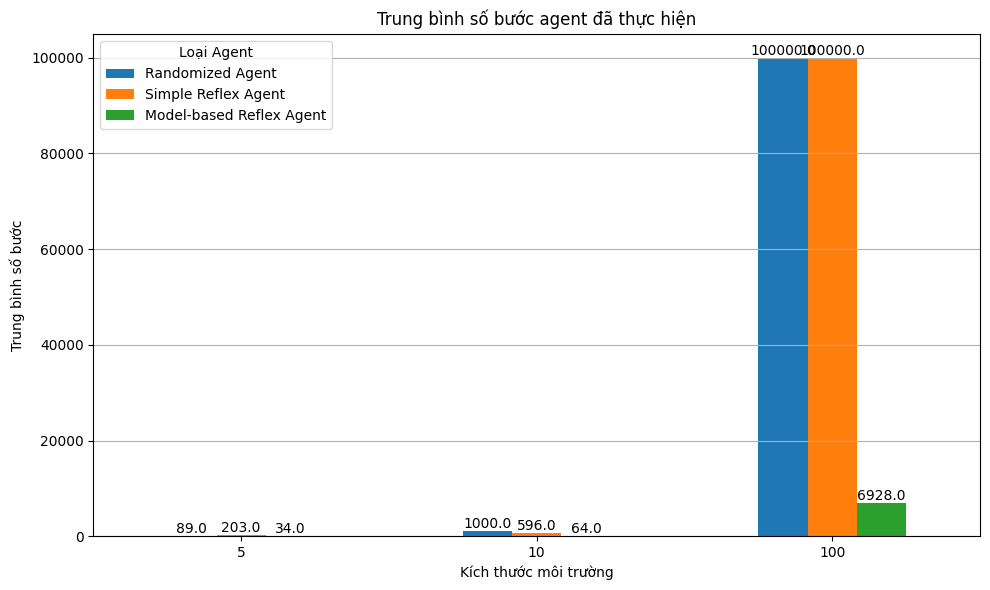

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ax = average_results_df.plot(kind='bar', figsize=(10, 6))

plt.title('Trung bình số bước agent đã thực hiện')
plt.xlabel('Kích thước môi trường')
plt.ylabel('Trung bình số bước')
plt.xticks(rotation=0)
plt.legend(title='Loại Agent')
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.tight_layout()
plt.show()

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

In [ ]:
# Answers goes here
"""Mô tả hiệu suất của các cài đặt agent
  * Nếu được đặt vào phòng hình chữ nhật có kích thước không xác định:
    - Simple Randomized Agent: Agent này hoàn toàn không quan tâm đến kích thước hay hình dạng phòng. Nó sẽ tiếp tục di chuyển ngẫu nhiên cho đến khi hết năng lượng. Hiệu suất rất kém vì nó không có chiến lược dọn dẹp.
    - Simple Reflex Agent: Agent này phản ứng với cảm biến chạm tường, nên nó sẽ không đâm vào tường ngay cả trong phòng hình chữ nhật. Tuy nhiên, vì không có bộ nhớ hay trạng thái, nó sẽ di chuyển ngẫu nhiên trong không gian có sẵn và có thể bỏ sót các khu vực chưa được dọn dẹp. Nó cũng không biết khi nào toàn bộ phòng đã sạch.
    - Model-based Reflex Agent: Agent này dựa vào việc biết toàn bộ bản đồ (envi) để tìm ô bẩn gần nhất. Nếu không biết kích thước và hình dạng phòng, chiến lược này sẽ không hoạt động. Nó cần một cơ chế để khám phá môi trường và xây dựng bản đồ nội bộ, điều mà reflex agent đơn giản không làm được.
  * Nếu khu vực dọn dẹp có hình dạng bất thường:
    - Simple Randomized Agent: Vẫn hoạt động (một cách kém hiệu quả) bằng cách di chuyển ngẫu nhiên trong không gian cho phép.
    - Simple Reflex Agent: Tương tự như trên, nó sẽ di chuyển ngẫu nhiên trong khu vực có thể đi qua, phản ứng với các "tường" do hình dạng bất thường tạo ra. Hiệu suất vẫn kém và không đảm bảo làm sạch hết.
    - Model-based Reflex Agent: Cần một bản đồ chính xác của khu vực dọn dẹp để tìm ô bẩn. Với hình dạng bất thường, bản đồ 2D hình chữ nhật đơn giản sẽ không đủ, và chiến lược tìm đường dựa trên tọa độ đơn giản có thể không hoạt động. Nó cần khả năng xử lý các không gian phức tạp hơn.
  * Nếu phòng chứa chướng ngại vật:
    - Simple Randomized Agent: Có thể đâm vào chướng ngại vật nếu hành động ngẫu nhiên hướng về đó. Nó không nhận biết chướng ngại vật khác với tường thông thường.
    - Simple Reflex Agent: Cảm biến chạm tường sẽ giúp agent không đâm vào chướng ngại vật (vì chúng hoạt động như tường). Tuy nhiên, agent vẫn sẽ di chuyển ngẫu nhiên xung quanh chướng ngại vật và có thể bị kẹt hoặc bỏ sót các khu vực phía sau chướng ngại vật.
    - Model-based Reflex Agent: Agent hiện tại sẽ coi chướng ngại vật như tường. Tuy nhiên, chiến lược tìm đường đến ô bẩn gần nhất có thể bị ảnh hưởng nếu đường đi bị chướng ngại vật chặn. Nó cần khả năng tìm đường vòng qua chướng ngại vật, điều mà cài đặt hiện tại chưa có. Nó cũng cần cập nhật bản đồ nội bộ để ghi nhận vị trí chướng ngại vật.
  * Nếu cảm biến bụi không hoàn hảo (10% sai):
    - Simple Randomized Agent: Không sử dụng cảm biến bụi nên không bị ảnh hưởng trực tiếp bởi lỗi cảm biến bụi. Tuy nhiên, vì nó không dọn dẹp có hệ thống, việc cảm biến có đúng hay sai cũng không cải thiện hiệu suất.
    - Simple Reflex Agent: Sẽ bị ảnh hưởng đáng kể. Nó có thể bỏ sót các ô bẩn (khi cảm biến báo sạch sai) hoặc cố gắng "suck" ở các ô đã sạch (khi cảm biến báo bẩn sai), lãng phí năng lượng.
    - Model-based Reflex Agent: Bị ảnh hưởng. Nếu cảm biến báo sai, agent có thể nghĩ rằng một ô bẩn đã sạch và bỏ qua nó, hoặc nghĩ rằng một ô sạch là bẩn và quay lại "suck", lãng phí bước đi. Khả năng làm sạch toàn bộ phòng sẽ giảm. Agent cần một cách để xử lý thông tin không chắc chắn từ cảm biến (ví dụ: thử dọn dẹp lại các ô đã báo sạch sau một thời gian).
  * Nếu cảm biến va chạm không hoàn hảo (10% không báo tường):
    - Simple Randomized Agent: Không sử dụng cảm biến va chạm nên không bị ảnh hưởng. Tuy nhiên, nó vẫn có thể đâm vào tường hoặc chướng ngại vật.
    - Simple Reflex Agent: Sẽ thỉnh thoảng đâm vào tường hoặc chướng ngại vật do cảm biến không báo đúng. Điều này có thể làm mất bước đi hoặc khiến agent bị kẹt.
    - Model-based Reflex Agent: Cũng sẽ thỉnh thoảng đâm vào tường hoặc chướng ngại vật. Điều này có thể làm sai lệch vị trí ước tính của agent trong bộ nhớ (state), khiến bản đồ nội bộ bị sai lệch và ảnh hưởng đến chiến lược tìm đường đến ô bẩn. Agent cần cơ chế để phát hiện sự không nhất quán giữa hành động (cố gắng di chuyển) và percept (không có bumper nhưng vị trí không đổi) để cập nhật trạng thái hoặc bản đồ của mình."""

## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [ ]:
# Your code and discussion goes here

## More Advanced Implementation (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment. We will learn implementation strategies and algorithms useful for these tasks during the rest of the semester.

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can.

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code